<a href="https://colab.research.google.com/github/Karthicraja-007/Building-damage-classification-using-keras-model/blob/master/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files = files.upload()

Saving trainingHBA1C_Challenge.csv to trainingHBA1C_Challenge.csv


In [0]:
import pandas as pd
data = pd.read_csv('trainingHBA1C_Challenge.csv')

In [0]:
data = pd.DataFrame(data)

In [9]:
data.head()

,NAME,BPM,AvgVo,RMSVSD,SDVNN,pNNV50,RM,RSTD,GM,GSTD,GMnSTD,RM2,GM2,GSTD2,AvgVo.1,RMSVSD.1,SDVNN.1,pNNV50.1,Actual HBA1c
0,Rabindra shrestha,68,1.2,14.2,15.3,5.1,452.2,15.3,3.5,0.8,1.364115,3.887730,1.504077,0.587787,1.2,1.2,15.3,5.1,4.5
1,Nelson charge kuria,56,1.0,11.6,10.3,9.7,499.9,3.9,48.6,12.6,3.633050,3.887730,3.903991,2.610070,1.0,11.6,10.3,9.7,5.1
2,Sunita duwalshreshtha,93,0.4,9.7,10.3,4.7,486.8,12.3,8.3,3.0,1.664531,0.095310,2.230014,1.386294,0.4,9.7,10.3,4.7,5.1
3,yeshenesh wolde,64,0.3,9.8,7.5,2.4,493.3,4.3,17.9,15.1,1.705888,2.653242,2.939162,2.778819,0.3,9.8,7.5,2.4,5.1
4,Anita khera,96,0.1,2.7,2.4,0.0,505.4,3.8,10.3,5.6,2.159222,2.041220,2.424803,1.887070,0.1,2.7,2.4,0.0,5.2


In [0]:
data.columns = data.feature_names
data['Actual HBA1c'] = boston.target

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
X, y = data.iloc[:,1:-1],data.iloc[:,-1]

In [7]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, 
                          alpha = 10, n_estimators = 10)

In [10]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.514451


In [12]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=100)

[05:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
print((cv_results["test-rmse-mean"]).tail(1))

34    2.119768
Name: test-rmse-mean, dtype: float64


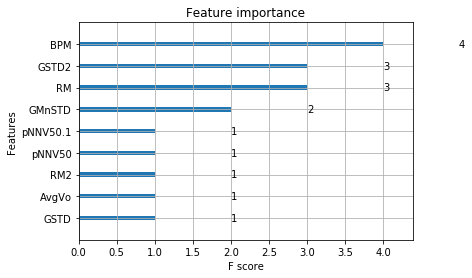

In [14]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [0]:
from sklearn.metrics import r2_score
z = r2_score(y_test, preds)

In [29]:
z

-1.5522641867172404

In [0]:
y = data.pop('Actual HBA1c')

In [0]:
x = data[['BPM', 'GSTD2', 'RM', 'GMnSTD', 'AvgVo']].values

In [0]:
x = pd.DataFrame(x)

In [42]:
x.head()

,0,1,2,3,4
0,68.0,0.587787,452.2,1.364115,1.2
1,56.0,2.610070,499.9,3.633050,1.0
2,93.0,1.386294,486.8,1.664531,0.4
3,64.0,2.778819,493.3,1.705888,0.3
4,96.0,1.887070,505.4,2.159222,0.1


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 50)
regressor.fit(x_train, y_train.ravel()) # Using ravel() to avoid getting 'DataConversionWarning' warning message

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

In [0]:
y_pred = regressor.predict(x_test)